### EDA - Rossmann store sales prediction

In [1]:
#import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data's:

train = pd.read_csv("train.csv", parse_dates=['Date'])
test  = pd.read_csv("test.csv", parse_dates=['Date'])
store = pd.read_csv("store.csv")

In [3]:
# Rearrange the column:
train = train[['Store', 'Open', 'Date', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Customers', 'Promo', 'Sales']]

print("Train shape: ", train.shape)
train.sample(10)

Train shape:  (1017209, 9)


,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Customers,Promo,Sales
697027,938,1,2013-10-15,2,0,1,914,0,7887
724091,127,1,2013-09-20,5,0,0,520,0,3584
720273,769,1,2013-09-24,2,0,0,2680,1,8486
904277,798,1,2013-04-12,5,0,0,1038,1,7672
162655,981,0,2015-03-08,7,0,0,0,0,0
98361,242,1,2015-05-04,1,0,0,512,1,6798
349119,648,1,2014-09-02,2,0,0,642,1,7808
271659,823,1,2014-11-24,1,0,0,765,1,8481
206655,381,1,2015-01-27,2,0,0,1162,1,11156
572144,935,1,2014-02-04,2,0,0,704,1,6845


In [4]:
#Rearrange the Dataset columns:

test  =  test[['Store', 'Open', 'Date', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Promo']]


print("Test shape:", test.shape)
test.sample(10)

Test shape: (41088, 7)


,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Promo
23825,924,1.0,2015-08-21,5,0,0,1
20777,304,1.0,2015-08-24,1,0,1,0
7695,1105,1.0,2015-09-09,3,0,0,0
13411,738,1.0,2015-09-02,3,0,0,1
37051,316,1.0,2015-08-05,3,0,1,1
17950,1083,1.0,2015-08-28,5,0,1,0
4461,238,1.0,2015-09-12,6,0,0,0
17664,705,1.0,2015-08-28,5,0,0,0
33042,666,1.0,2015-08-10,1,0,1,0
34803,728,1.0,2015-08-08,6,0,0,0


In [5]:
print("Store Shape: ", store.shape)
store

Store Shape:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
#Check if there is missing values:
train.isnull().sum()

Store            0
Open             0
Date             0
DayOfWeek        0
StateHoliday     0
SchoolHoliday    0
Customers        0
Promo            0
Sales            0
dtype: int64

In [7]:
test.isnull().sum()

Store             0
Open             11
Date              0
DayOfWeek         0
StateHoliday      0
SchoolHoliday     0
Promo             0
dtype: int64

In [8]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
train.DayOfWeek.value_counts(sort=False)

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

### Data Visualization:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


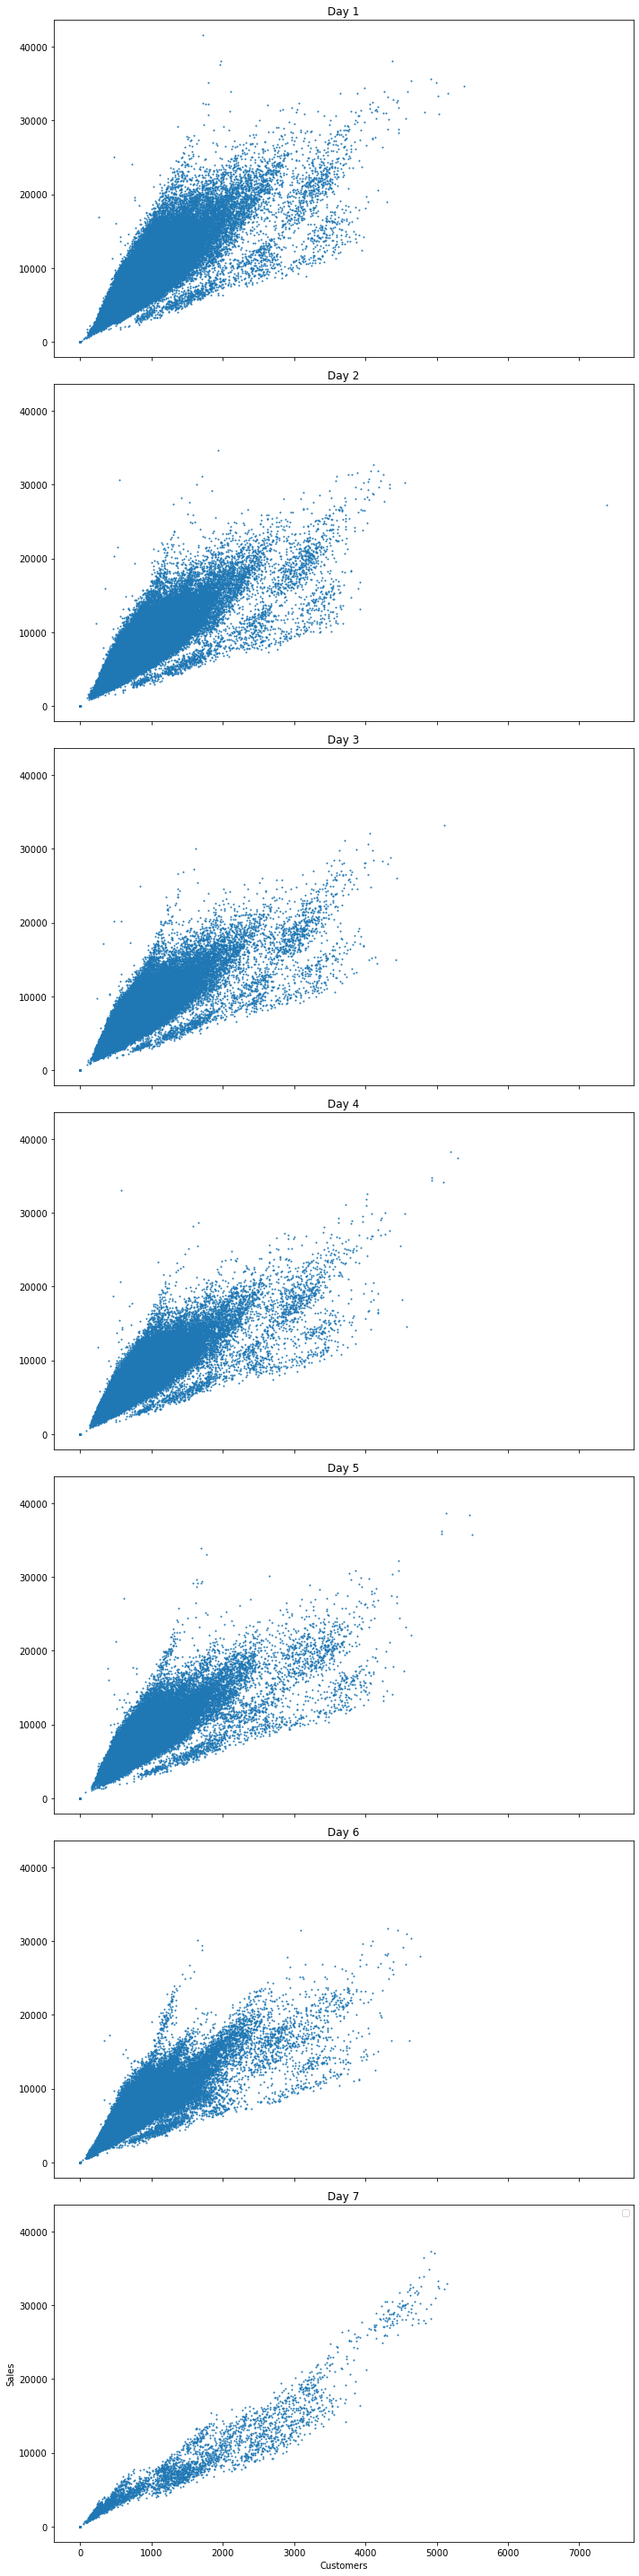

In [10]:
# Visualize the continous Variable:
plt.rcParams['figure.figsize'] = (10, 40)

fig, ax = plt.subplots(7, sharex=True, sharey=True)

for i in range(0,7):
    day = train[train['DayOfWeek'] == i+1]
    ax[i].set_title("Day {0}".format(i+1))
    ax[i].scatter(day['Customers'], day['Sales'], s=1)
    
plt.legend()
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()
    

In [11]:
train.head()

,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Customers,Promo,Sales
0,1,1,2015-07-31,5,0,1,555,1,5263
1,2,1,2015-07-31,5,0,1,625,1,6064
2,3,1,2015-07-31,5,0,1,821,1,8314
3,4,1,2015-07-31,5,0,1,1498,1,13995
4,5,1,2015-07-31,5,0,1,559,1,4822


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   Open           1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   DayOfWeek      1017209 non-null  int64         
 4   StateHoliday   1017209 non-null  object        
 5   SchoolHoliday  1017209 non-null  int64         
 6   Customers      1017209 non-null  int64         
 7   Promo          1017209 non-null  int64         
 8   Sales          1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [13]:
train.sort_values(by=['Date'], inplace=True, ascending=True)
train

,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Customers,Promo,Sales
1017208,1115,0,2013-01-01,2,a,1,0,0,0
1016473,379,0,2013-01-01,2,a,1,0,0,0
1016472,378,0,2013-01-01,2,a,1,0,0,0
1016471,377,0,2013-01-01,2,a,1,0,0,0
1016470,376,0,2013-01-01,2,a,1,0,0,0
...,...,...,...,...,...,...,...,...,...
745,746,1,2015-07-31,5,0,1,638,1,9082
746,747,1,2015-07-31,5,0,1,826,1,10708
747,748,1,2015-07-31,5,0,1,578,1,7481
741,742,1,2015-07-31,5,0,1,1016,1,10460


## Feature engineering:



In [14]:
# Extract information from Date:

dftmp = train.copy()

In [15]:
dftmp.insert(3, 'SaleYear', dftmp.Date.dt.year)
dftmp.insert(4, 'SaleMonth', dftmp.Date.dt.month)
dftmp.insert(5, 'SaleDay', dftmp.Date.dt.day)
dftmp.insert(6, 'SaleDayOfWeek', dftmp.Date.dt.day_of_week)
dftmp.insert(7, 'SaleDayOfYear', dftmp.Date.dt.day_of_year)


In [16]:
dftmp['DayOfWeek'] = dftmp.DayOfWeek.apply(lambda X: int(X-1))

In [17]:
dftmp.drop(['Date', 'DayOfWeek'],axis=1 ,inplace=True)

In [18]:
# Correlation matrix
def plot_Corr(data):
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
    return sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

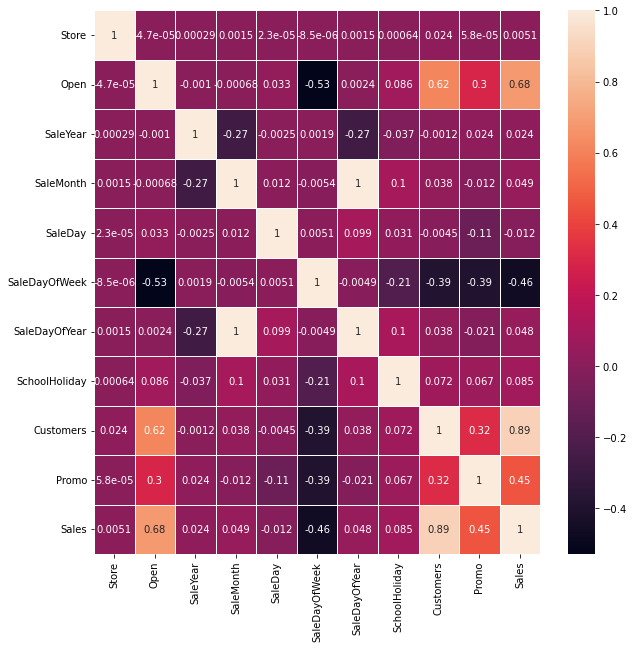

In [19]:
plot_Corr(dftmp)

In [20]:
not_open = dftmp[(dftmp['Open'] == 0) & (dftmp['Sales'] != 0)]
print("No closed store with sales: " + str(not_open.size == 0))

no_sales = dftmp[(dftmp['Open'] == 1) & (dftmp['Sales'] <= 0)]
print("No open store with no sales: " + str(no_sales.size == 0))

No closed store with sales: True
No open store with no sales: False


In [21]:
dftmp = dftmp.loc[train['Sales'] > 0]

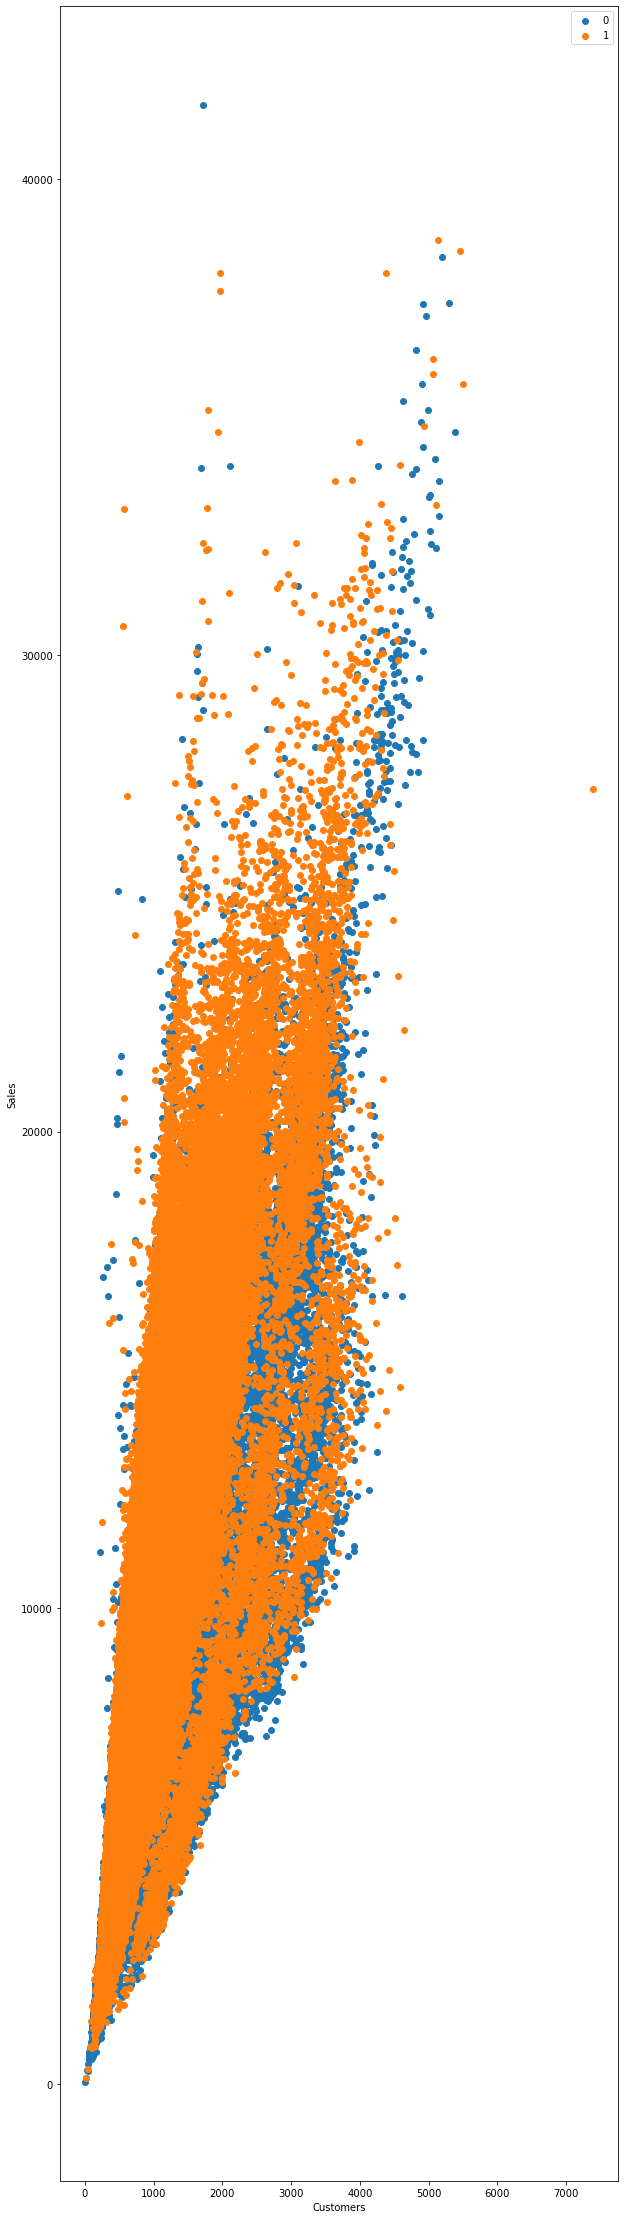

In [22]:
for i in [0, 1]:
    data = dftmp[dftmp['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [23]:
# Let's build a machine learning model.

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1, random_state=1234)

X = dftmp.drop('Sales', axis=1)
Y = dftmp['Sales']

#rfr.fit(X,Y)

In [24]:
# We need to convert String values into int before that we need to deal with missing values.
pd.api.types.is_string_dtype(dftmp['SchoolHoliday'])

False

In [25]:
#Find the Column which is String/object dtypes:

for column, values in dftmp.items():
    if pd.api.types.is_string_dtype(values):
        print(column)

StateHoliday


In [26]:
# Convert all the object dtpye column into number:
catcol = []
for column, value in dftmp.items():
    if pd.api.types.is_string_dtype(value):
        dftmp[column] = value.astype('category').cat.as_ordered()
        catcol.append(column)

In [27]:
dftmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 1016447 to 0
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Store          844338 non-null  int64   
 1   Open           844338 non-null  int64   
 2   SaleYear       844338 non-null  int64   
 3   SaleMonth      844338 non-null  int64   
 4   SaleDay        844338 non-null  int64   
 5   SaleDayOfWeek  844338 non-null  int64   
 6   SaleDayOfYear  844338 non-null  int64   
 7   StateHoliday   844338 non-null  category
 8   SchoolHoliday  844338 non-null  int64   
 9   Customers      844338 non-null  int64   
 10  Promo          844338 non-null  int64   
 11  Sales          844338 non-null  int64   
dtypes: category(1), int64(11)
memory usage: 78.1 MB


In [28]:
# Calculate missing values in percentage:

dftmp.isnull().sum()/len(dftmp)

Store            0.0
Open             0.0
SaleYear         0.0
SaleMonth        0.0
SaleDay          0.0
SaleDayOfWeek    0.0
SaleDayOfYear    0.0
StateHoliday     0.0
SchoolHoliday    0.0
Customers        0.0
Promo            0.0
Sales            0.0
dtype: float64

In [29]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
#dftmp.drop('AvgSalesPerCustomer', axis=1, inplace=True)

In [31]:
#Shrink the train data according to Store dataset:
#Store dataset contains only store information so, we need to take avg of our OG train dataset and merge the both data set

dftmp['AvgSalesPerCustomer'] = dftmp['Sales']/dftmp['Customers']

avg_store = dftmp.groupby('Store')[['Sales', 'Customers', 'AvgSalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store

,Store,AvgSales,AvgCustomers,AvgAvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5251.702182,451.711168,11.547388,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,10236.577664,838.608472,11.993853,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,6627.859694,717.029337,9.211189,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,20666.562500,3200.946429,6.454992,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [32]:
avg_store

,AvgSales,AvgCustomers,AvgAvgSalesPerCustomer
Store,,,
1,4759.096031,564.049936,8.393038
2,4953.900510,583.998724,8.408443
3,6942.568678,750.077022,9.117599
4,9638.401786,1321.752551,7.249827
5,4676.274711,537.340180,8.611229
...,...,...,...
1111,5251.702182,451.711168,11.547388
1112,10236.577664,838.608472,11.993853
1113,6627.859694,717.029337,9.211189


In [33]:
#Find the Column which is String/object dtypes:

for column, values in store.items():
    if pd.api.types.is_string_dtype(values):
        print(column)

StoreType
Assortment
PromoInterval


['c' 'a' 'd' 'b']


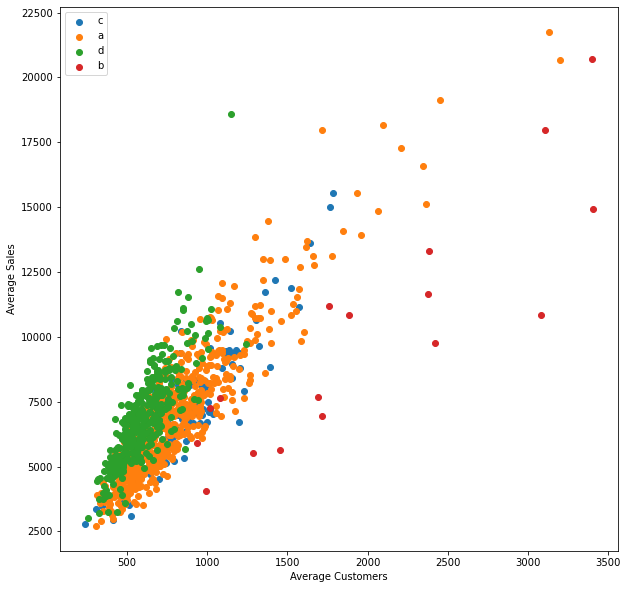

In [34]:

# Visualize the continous Variable:
plt.rcParams['figure.figsize'] = (10, 10)

print(store.StoreType.unique())

for i in store.StoreType.unique():
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

['a' 'c' 'b']


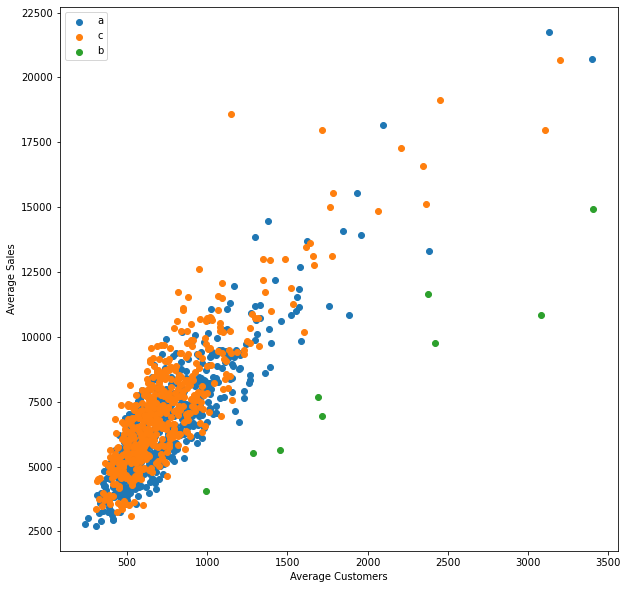

In [35]:
print(store.Assortment.unique())

for i in store.Assortment.unique():
    data = store[store['Assortment'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

[0 1]


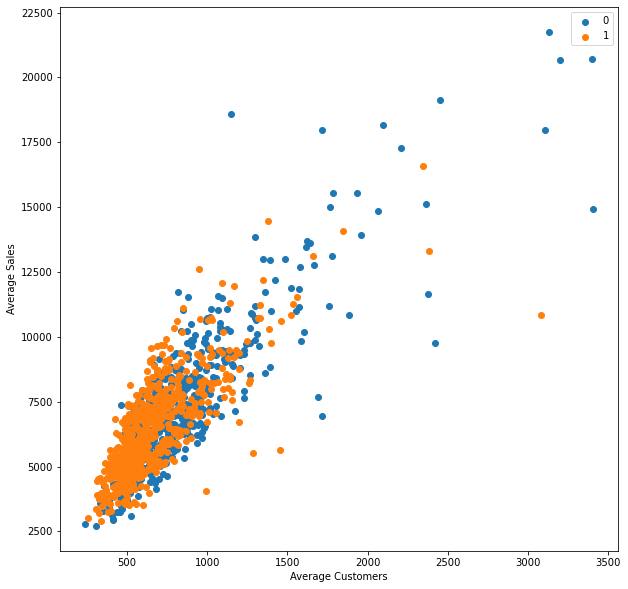

In [36]:
print(store.Promo2.unique())
for i in store.Promo2.unique():
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

In [37]:
store.isnull().sum()

Store                          0
AvgSales                       0
AvgCustomers                   0
AvgAvgSalesPerCustomer         0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [38]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   AvgSales                   1115 non-null   float64
 2   AvgCustomers               1115 non-null   float64
 3   AvgAvgSalesPerCustomer     1115 non-null   float64
 4   StoreType                  1115 non-null   object 
 5   Assortment                 1115 non-null   object 
 6   CompetitionDistance        1112 non-null   float64
 7   CompetitionOpenSinceMonth  761 non-null    float64
 8   CompetitionOpenSinceYear   761 non-null    float64
 9   Promo2                     1115 non-null   int64  
 10  Promo2SinceWeek            571 non-null    float64
 11  Promo2SinceYear            571 non-null    float64
 12  PromoInterval              571 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage:

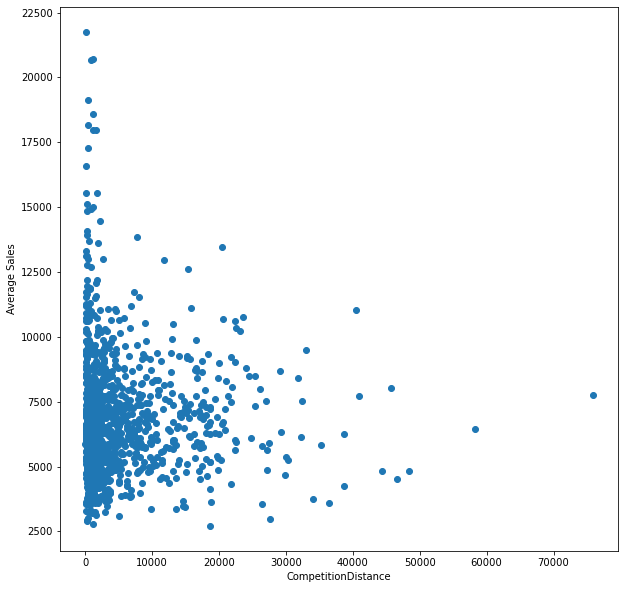

In [39]:


# fill NaN values
store["CompetitionDistance"].fillna(-1)


plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()



In [40]:
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes
dftmp["StateHoliday"] = dftmp["StateHoliday"].astype('category').cat.codes
dftmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 1016447 to 0
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   Open                 844338 non-null  int64  
 2   SaleYear             844338 non-null  int64  
 3   SaleMonth            844338 non-null  int64  
 4   SaleDay              844338 non-null  int64  
 5   SaleDayOfWeek        844338 non-null  int64  
 6   SaleDayOfYear        844338 non-null  int64  
 7   StateHoliday         844338 non-null  int8   
 8   SchoolHoliday        844338 non-null  int64  
 9   Customers            844338 non-null  int64  
 10  Promo                844338 non-null  int64  
 11  Sales                844338 non-null  int64  
 12  AvgSalesPerCustomer  844338 non-null  float64
dtypes: float64(1), int64(11), int8(1)
memory usage: 84.5 MB


In [41]:
store.shape

(1115, 13)

In [42]:
dftmp.shape

(844338, 13)

In [43]:
merged = pd.merge(dftmp, store, on='Store', how='left')
merged.shape

(844338, 25)

In [44]:
merged.isnull().sum()

Store                             0
Open                              0
SaleYear                          0
SaleMonth                         0
SaleDay                           0
SaleDayOfWeek                     0
SaleDayOfYear                     0
StateHoliday                      0
SchoolHoliday                     0
Customers                         0
Promo                             0
Sales                             0
AvgSalesPerCustomer               0
AvgSales                          0
AvgCustomers                      0
AvgAvgSalesPerCustomer            0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [45]:
merged.shape

(844338, 25)

In [46]:
merged.head().T

,0,1,2,3,4
Store,353,335,512,494,530
Open,1,1,1,1,1
SaleYear,2013,2013,2013,2013,2013
SaleMonth,1,1,1,1,1
SaleDay,1,1,1,1,1
SaleDayOfWeek,1,1,1,1,1
SaleDayOfYear,1,1,1,1,1
StateHoliday,2,2,2,2,2
SchoolHoliday,1,1,1,1,1
Customers,820,482,625,527,532


In [47]:
merged.isnull().sum()

Store                             0
Open                              0
SaleYear                          0
SaleMonth                         0
SaleDay                           0
SaleDayOfWeek                     0
SaleDayOfYear                     0
StateHoliday                      0
SchoolHoliday                     0
Customers                         0
Promo                             0
Sales                             0
AvgSalesPerCustomer               0
AvgSales                          0
AvgCustomers                      0
AvgAvgSalesPerCustomer            0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [48]:
# remove ALL NaNs from all features
merged.fillna(0, inplace=True)

In [49]:
merged.isna().sum()

Store                        0
Open                         0
SaleYear                     0
SaleMonth                    0
SaleDay                      0
SaleDayOfWeek                0
SaleDayOfYear                0
StateHoliday                 0
SchoolHoliday                0
Customers                    0
Promo                        0
Sales                        0
AvgSalesPerCustomer          0
AvgSales                     0
AvgCustomers                 0
AvgAvgSalesPerCustomer       0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [50]:
# We can find how column differ using set:
(merged['SaleYear'] - merged['CompetitionOpenSinceYear'])

0         2013.0
1         2013.0
2         2013.0
3            2.0
4         2013.0
           ...  
844333       4.0
844334       7.0
844335       5.0
844336    2015.0
844337       7.0
Length: 844338, dtype: float64

In [51]:
(merged['SaleMonth'] - merged['CompetitionOpenSinceMonth'])

0         1.0
1         1.0
2         1.0
3        -5.0
4         1.0
         ... 
844333    5.0
844334   -1.0
844335    4.0
844336    7.0
844337   -2.0
Length: 844338, dtype: float64

In [52]:
# Number of months that competition has existed for
merged['MonthsCompetitionOpen'] = 12 * (merged['SaleYear'] - merged['CompetitionOpenSinceYear']) + (merged['SaleMonth'] - merged['CompetitionOpenSinceMonth'])
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] = 0

In [53]:
merged.dtypes

Store                          int64
Open                           int64
SaleYear                       int64
SaleMonth                      int64
SaleDay                        int64
SaleDayOfWeek                  int64
SaleDayOfYear                  int64
StateHoliday                    int8
SchoolHoliday                  int64
Customers                      int64
Promo                          int64
Sales                          int64
AvgSalesPerCustomer          float64
AvgSales                     float64
AvgCustomers                 float64
AvgAvgSalesPerCustomer       float64
StoreType                       int8
Assortment                      int8
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
MonthsCompetitionOpen        float64
dtype: object

In [54]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen']

merged[toInt] = merged[toInt].astype(int)



In [55]:
# We have already created a new variable with mean, now with median coulmn
med_store = dftmp.groupby('Store')[['Sales', 'Customers', 'AvgSalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')

In [56]:
merged = pd.merge(med_store.reset_index(), merged, on='Store')
merged.head().T

,0,1,2,3,4
Store,1,1,1,1,1
MedSales,4647.0,4647.0,4647.0,4647.0,4647.0
MedCustomers,550.0,550.0,550.0,550.0,550.0
MedAvgSalesPerCustomer,8.362376,8.362376,8.362376,8.362376,8.362376
Open,1,1,1,1,1
SaleYear,2013,2013,2013,2013,2013
SaleMonth,1,1,1,1,1
SaleDay,2,3,4,5,7
SaleDayOfWeek,2,3,4,5,0
SaleDayOfYear,2,3,4,5,7


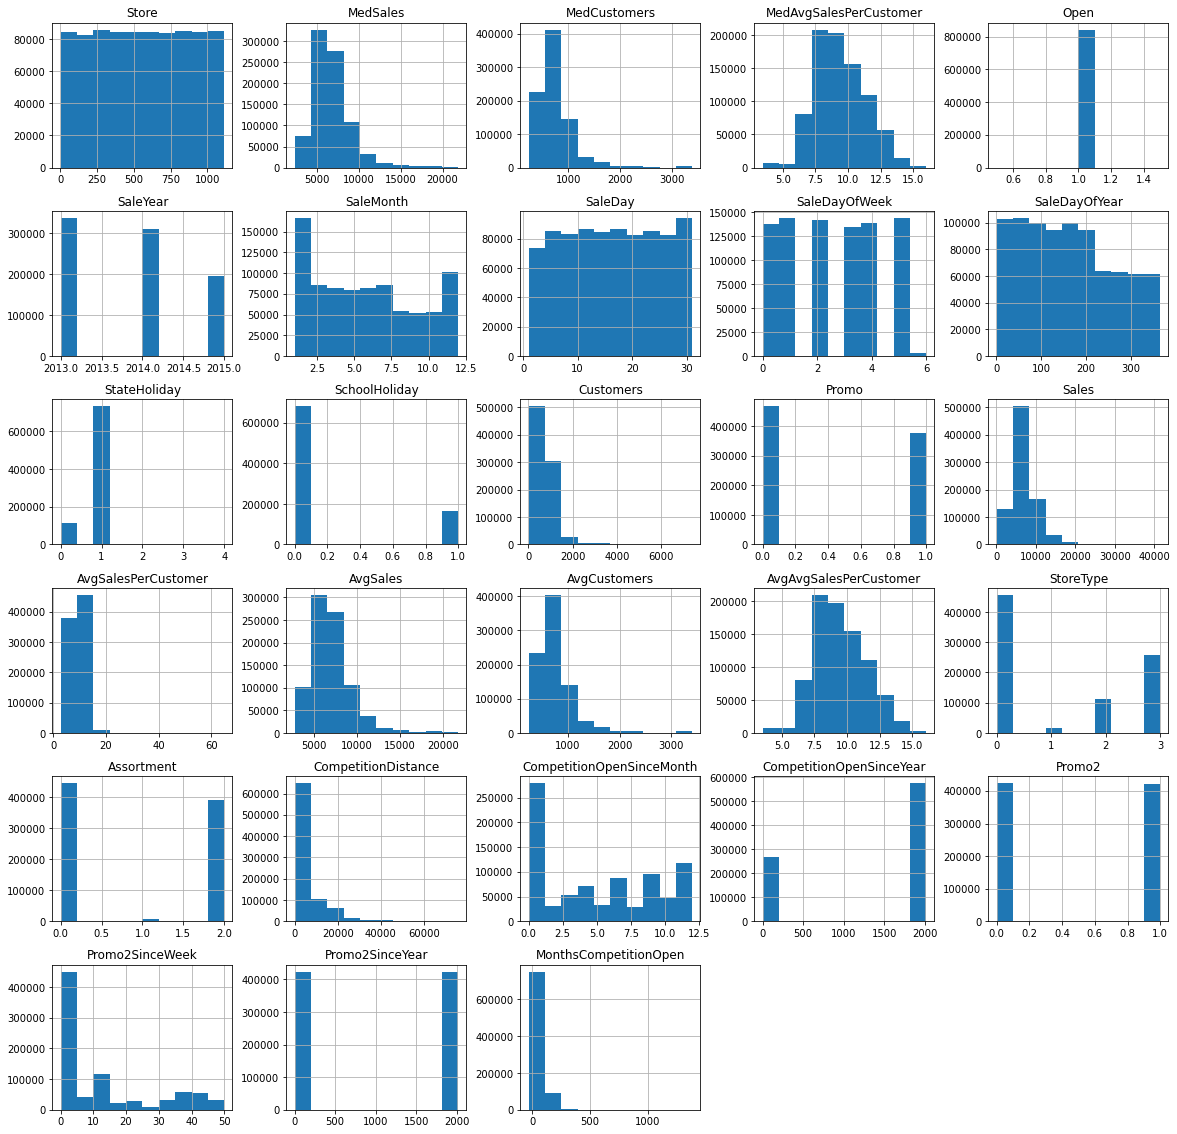

In [57]:
merged.hist(figsize=(20,20))
plt.show()

## Model Building:

In [68]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

    
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedAvgSalesPerCustomer',

    'SaleDayOfWeek',
    'SaleDay',
    'SaleMonth',
    'SaleYear',

]

X_data = merged[X]
Y_data = np.log(merged['Sales'])
# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=10)

#Creating Training set at 70%
tr_size  = 0.8*len(X_data)
tr_size = int(tr_size)

X_train = X_data[0 : tr_size]
X_test  = X_data[tr_size : len(X_data)]

y_train = Y_data[0 : tr_size]
y_test  = Y_data[tr_size : len(Y_data)]



In [69]:
X_test.SaleYear

675470    2013
675471    2013
675472    2013
675473    2013
675474    2013
          ... 
844333    2015
844334    2015
844335    2015
844336    2015
844337    2015
Name: SaleYear, Length: 168868, dtype: int64

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error



def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [71]:
# Create evaluation funtion 
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculate root mean squared error 
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_pred))


def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred   = model.predict(X_test)
    
    scores = {"Trainig MAE    :": mean_absolute_error(y_train, train_pred),
              "Valid MAE      :": mean_absolute_error(y_test, val_pred),
              "Training RMSLE :": rmsle(y_train, train_pred),
              "Valid RMSLE    :": rmsle(y_test, val_pred),
              "Training R^2   :": r2_score(y_train, train_pred),
              "Valid R^2      :": r2_score(y_test, val_pred)
             }
    return scores


In [72]:
%%time
#cutting down on max samples each estimator can see to improve training time
rfr = RandomForestRegressor(n_jobs=-1, random_state=1234, max_samples=100000)
rfr.fit(X_train, y_train)

CPU times: user 2min 15s, sys: 803 ms, total: 2min 16s
Wall time: 17.8 s


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=1234)

In [73]:
#Show scores:
show_scores(rfr)

{'Trainig MAE    :': 0.0008567975975776477,
 'Valid MAE      :': 0.001192227052709806,
 'Training RMSLE :': 0.0006217440137505874,
 'Valid RMSLE    :': 0.001205710715855996,
 'Training R^2   :': 0.9998733633210061,
 'Valid R^2      :': 0.9993047735037858}

In [74]:
#Diffrent Random Forest regressor hyperparameters
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth"   :[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples":[50000]
          }



In [75]:
%%time
#Initiate RandomisedSearchCV model:


ran_serchCV = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=1234), 
                                param_distributions= rf_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True
                                )

ran_serchCV.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 25s, sys: 8.73 s, total: 1min 34s
Wall time: 2min 20s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1,
                                                   random_state=1234),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [50000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [79]:
#Find the best model hyperparameter 

ran_serchCV.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 50000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [142]:
#Evaluate Randomised Searc CV model:
show_scores(ran_serchCV)

{'Trainig MAE    :': 0.003958135935751941,
 'Valid MAE      :': 0.004015155110063939,
 'Training RMSLE :': 0.0012014848331180082,
 'Valid RMSLE    :': 0.0009704085357453722,
 'Training R^2   :': 0.9993857762032059,
 'Valid R^2      :': 0.9995212995232994}

In [76]:
from math import sqrt

pred = ran_serchCV.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

Root Mean squared error 110.86797587852394


In [78]:
ideal_model = RandomForestRegressor( n_estimators= 80,
                                     min_samples_split= 8,
                                     min_samples_leaf= 1,
                                     max_samples= None,
                                     max_features= 'sqrt',
                                     max_depth= 3,
                                     random_state = 1234
                                   )

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_split=8,
                      n_estimators=80, random_state=1234)

In [79]:
pred = ideal_model.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

Root Mean squared error 1800.7284776207903


In [84]:
show_scores(ideal_model)

{'Trainig MAE    :': 0.331620201593793,
 'Valid MAE      :': 0.332040767155183,
 'Training RMSLE :': 0.04381684190049101,
 'Valid RMSLE    :': 0.04388797966351337,
 'Training R^2   :': 0.00010884648437203825,
 'Valid R^2      :': -4.5303448688027714e-05}